<a href="https://colab.research.google.com/github/Jihoon0309/Data_study_book/blob/main/%08Chapter_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Matplotlib 기본 요소 알아보기

**Figure 객체**

Figure 라는 모든 그래프 구성 요소를 담고 있는 최상위 객체가 있음</br>
다양한 그래프 옵션을 조절 할 수 있음

In [1]:
import gdown
gdown.download('https://bit.ly/3pK7iuu', 'ns_book7.csv', quiet=False)

Downloading...
From: https://bit.ly/3pK7iuu
To: /content/ns_book7.csv
100%|██████████| 53.8M/53.8M [00:00<00:00, 69.6MB/s]


'ns_book7.csv'

In [2]:
import pandas as pd

ns_book7 = pd.read_csv('ns_book7.csv', low_memory=False)
ns_book7.head()

,번호,도서명,저자,출판사,발행년도,ISBN,세트 ISBN,부가기호,권,주제분류번호,도서권수,대출건수,등록일자
0,1,인공지능과 흙,김동훈 지음,민음사,2021,9788937444319,NaN,NaN,NaN,NaN,1,0,2021-03-19
1,2,가짜 행복 권하는 사회,김태형 지음,갈매나무,2021,9791190123969,NaN,NaN,NaN,NaN,1,0,2021-03-19
2,3,나도 한 문장 잘 쓰면 바랄 게 없겠네,김선영 지음,블랙피쉬,2021,9788968332982,NaN,NaN,NaN,NaN,1,0,2021-03-19
3,4,예루살렘 해변,"이도 게펜 지음, 임재희 옮김",문학세계사,2021,9788970759906,NaN,NaN,NaN,NaN,1,0,2021-03-19
4,5,김성곤의 중국한시기행 : 장강·황하 편,김성곤 지음,김영사,2021,9788934990833,NaN,NaN,NaN,NaN,1,0,2021-03-19


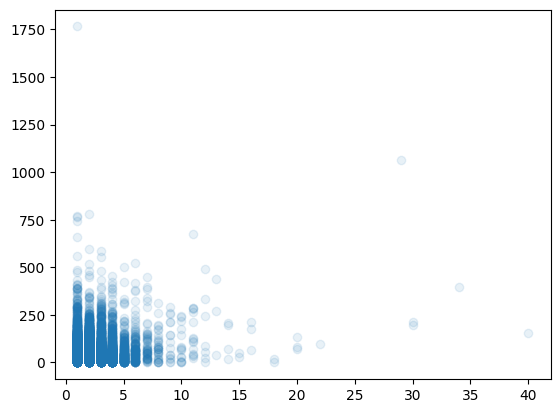

In [3]:
import matplotlib.pyplot as plt

plt.scatter(ns_book7['도서권수'], ns_book7['대출건수'], alpha=0.1)
plt.show()

그래프 크기 바꾸기: figsize 매개변수

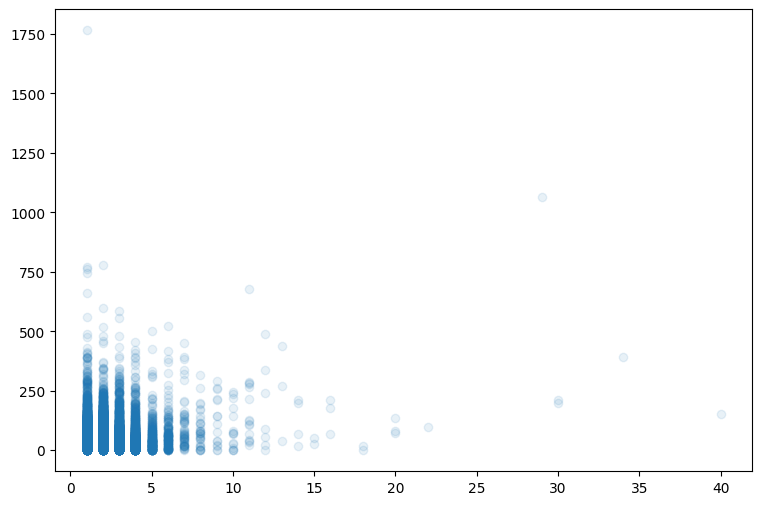

In [4]:
plt.figure(figsize=(9,6)) # 너비가 9인치, 높이가 6인치인 피겨 객체
plt.scatter(ns_book7['도서권수'], ns_book7['대출건수'], alpha=0.1)
plt.show()

In [5]:
print(plt.rcParams['figure.figsize'])

[6.4, 4.8]


사이즈를 확인해보면 9인치, 6인치에 미치지 못하는 값이 나옴</br>
인치값은 픽셀 값을 정한 다음 픽셀 값으로 DPI로 나누면 구할 수 있음

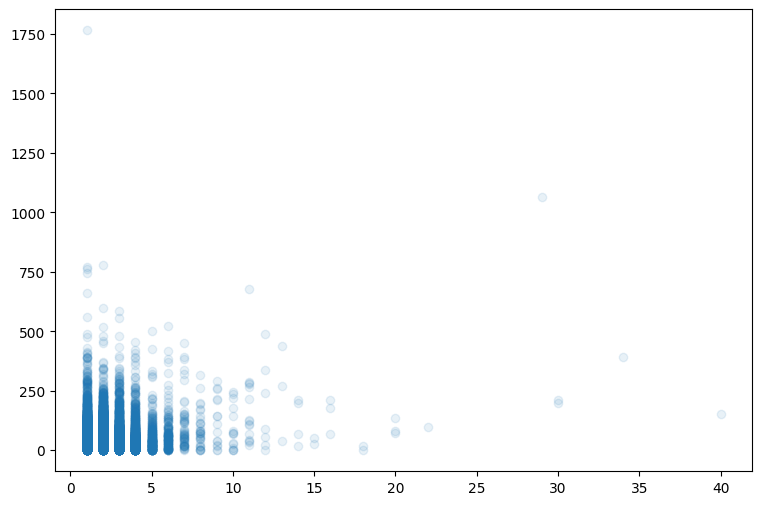

In [7]:
plt.figure(figsize=(900/100, 600/100))
plt.scatter(ns_book7['도서권수'], ns_book7['대출건수'], alpha=0.1)
plt.show()

In [6]:
print(plt.rcParams['figure.dpi'])

100.0


그래프 크기 바꾸기: dpi 매개변수

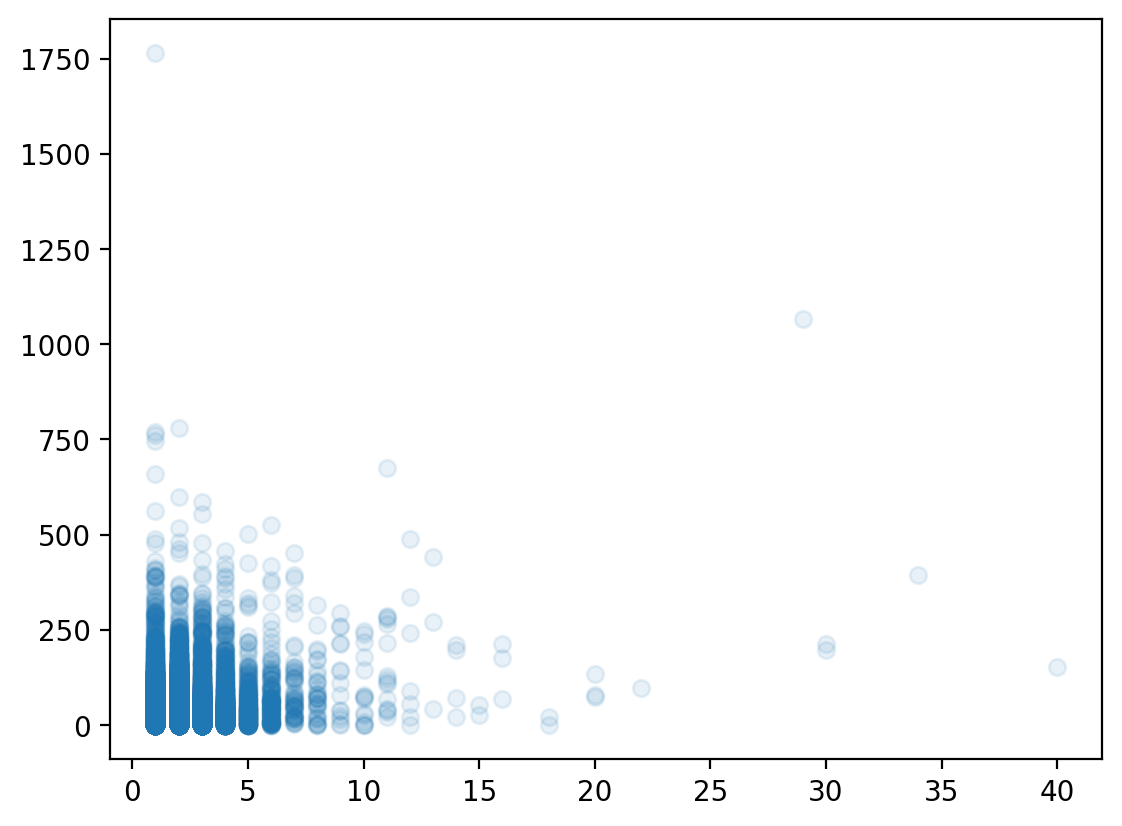

In [8]:
plt.figure(dpi=200)
plt.scatter(ns_book7['도서권수'],ns_book7['대출건수'], alpha=0.1)
plt.show()

**rcParams 객체**

matplotlib 그래프의 기본값을 관리하는 객체

DPI 기본값 바꾸기

In [9]:
plt.rcParams['figure.dpi']=100

산점도 마커 모양 바꾸기

In [11]:
plt.rcParams['scatter.marker']

'o'

In [12]:
plt.rcParams['scatter.marker']='*'

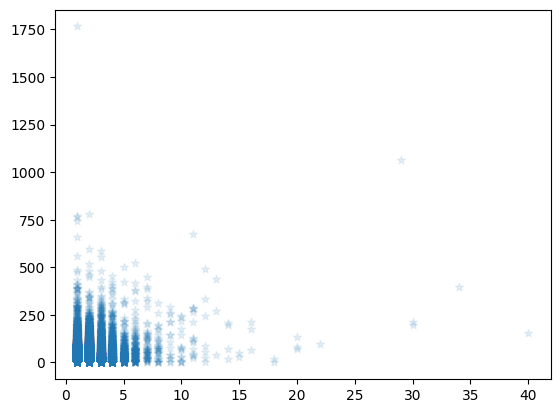

In [13]:
plt.scatter(ns_book7['도서권수'], ns_book7['대출건수'], alpha=0.1)
plt.show()

기본값을 수정하는 것 대신 scatter() 함수의 marker 매개변수로 마커의 모양 지정가능

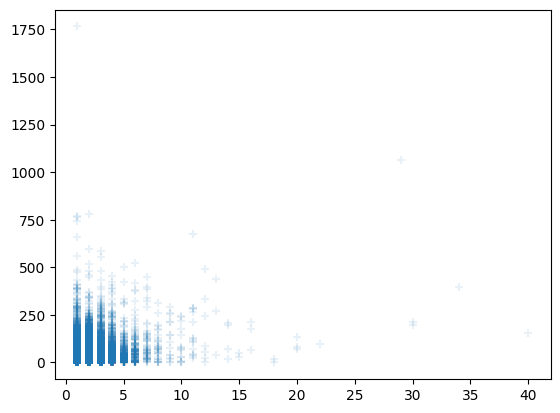

In [14]:
plt.scatter(ns_book7['도서권수'], ns_book7['대출건수'], alpha=0.1, marker='+')
plt.show()

**여러 개의 서브플롯 출력하기**

하나의 피겨 객체 안에 여러 개의 서브플롯을 담을 수 있음.</br>
matplotlib의 Axes 클래스 객체를 말하며 하나의 서브플롯은 두 개 이상의 축을 포함</br>

ex) 그래프를 여러개 그릴 수 있음

subplots()함수 : 서브플롯 그리기</br>

두 개의 서브플롯을 그리고 싶은경우 subplot() 매개변수의 2를 넣어줌</br>
배열의 원소에서 각각 원하는 그래프 함수를 호출함

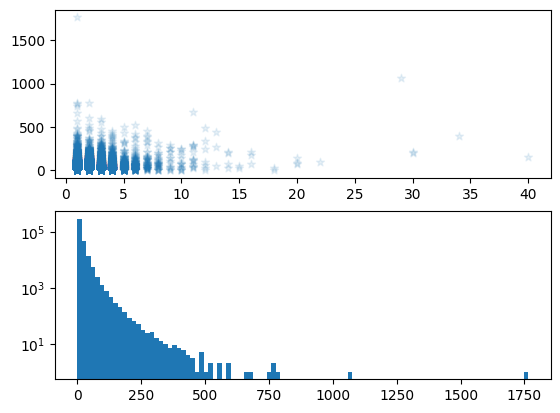

In [17]:
fig, axs = plt.subplots(2)

axs[0].scatter(ns_book7['도서권수'], ns_book7['대출건수'], alpha=0.1) # 첫번째 그래프
axs[1].hist(ns_book7['대출건수'], bins=100)
axs[1].set_yscale('log')

fig.show()

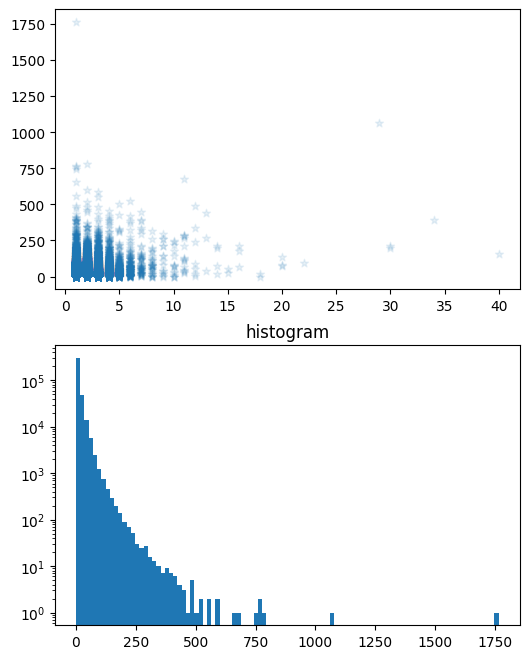

In [20]:
fig, axs = plt.subplots(2, figsize=(6, 8)) # 피겨 크기를 조정함

axs[0].scatter(ns_book7['도서권수'], ns_book7['대출건수'], alpha=0.1) # 첫번째 그래프
axs[0].set_title=['scatter plot'] # 제목 설정

axs[1].hist(ns_book7['대출건수'], bins=100)
axs[1].set_title('histogram')
axs[1].set_yscale('log')

fig.show()

서브플롯을 가로로 나란히 출력하기</br>

subplots()함수에 행과 열을 입력 매개변수에 앞은 행 뒤는 열 subplots(2) 는 1열 2행

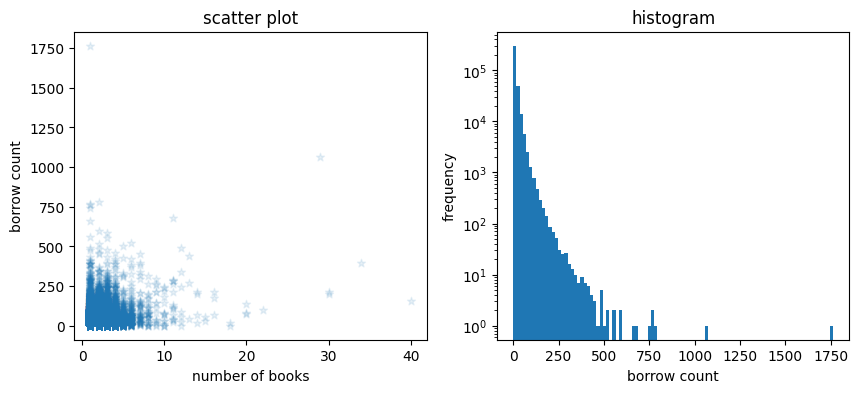

In [21]:
fig, axs = plt.subplots(1,2, figsize=(10,4))

axs[0].scatter(ns_book7['도서권수'], ns_book7['대출건수'], alpha=0.1)
axs[0].set_title('scatter plot')
axs[0].set_xlabel('number of books') # x축 이름
axs[0].set_ylabel('borrow count') # y축 이름

axs[1].hist(ns_book7['대출건수'], bins=100)
axs[1].set_title('histogram')
axs[1].set_yscale('log')
axs[1].set_xlabel('borrow count')
axs[1].set_ylabel('frequency')

plt.show()

# 선 그래프와 막대 그래프 그리기

**연도별 발행 도서 개수 구하기**

value.counts() 메서드 : 고유한 값의 등장 횟수를 계싼

In [23]:
count_by_year=ns_book7['발행년도'].value_counts()
count_by_year

2012    18601
2014    17797
2009    17611
2011    17523
2010    17503
        ...  
2650        1
2108        1
2104        1
2560        1
1947        1
Name: 발행년도, Length: 87, dtype: int64

2012년도에 발행된 책의 개수가 가장 많음

In [25]:
count_by_year = count_by_year.sort_index() # 인덱스 순으로 정렬
count_by_year

1947     1
1948     1
1949     1
1952    11
1954     1
        ..
2551     1
2552     2
2559     1
2560     1
2650     1
Name: 발행년도, Length: 87, dtype: int64

In [26]:
count_by_year = count_by_year[count_by_year.index <= 2030] # 인덱스가 2030이하 인것들만 출력
count_by_year

1947        1
1948        1
1949        1
1952       11
1954        1
        ...  
2020    11834
2021     1255
2025        1
2028        1
2030        1
Name: 발행년도, Length: 68, dtype: int64

**주제별 도서 개수 구하기**

'주제분류번호'열에 책을 분류하는 기준인 코드가 기입되어있음 예를 들어 주제분류번호가 1로 시작하면 철학, 2로 시작하면 종교 등</br>

주제분류번호의 첫 번째 문자만 선택하여 value_counts() 메서드를 적용하여 도서 개수 취합 가능함 하지만 NaN이 나오면 -1을 반환하는 함수를 만들어 걸려야함 함수 선언후 apply() 메서드에 넣어 데이터프레임 반복 적용

In [27]:
import numpy as np

def kdc_1st_char(no):
  if no is np.nan:
    return '-1'
  else:
    return no[0]

count_by_subject = ns_book7['주제분류번호'].apply(kdc_1st_char).value_counts()
count_by_subject

8     108643
3      80767
5      40916
9      26375
6      25070
1      22647
-1     16978
7      15836
4      13688
2      13474
0      12376
Name: 주제분류번호, dtype: int64

명목형 데이터 : 순서를 매길 수 없는 데이터(성별, 국가)</br>
순서형 데이터 : 순서를 매길 수 있는 데이터(만족도, 성적)

**선 그래프 그리기**

plot() 함수 : 선 그래프를 그릴 수 있음

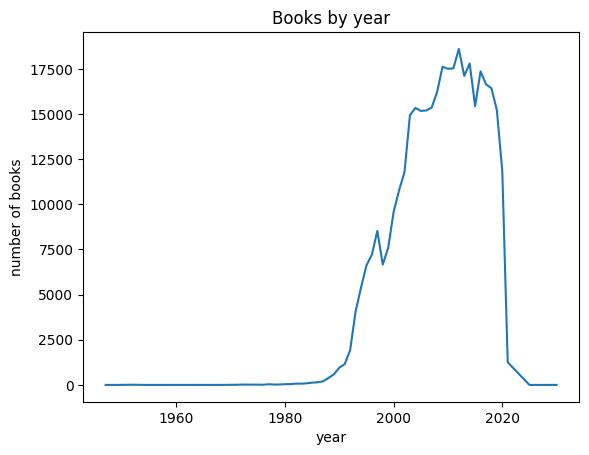

In [29]:
plt.plot(count_by_year.index, count_by_year.values)
plt.title('Books by year')
plt.xlabel('year')
plt.ylabel('number of books')
plt.show()

선 모양과 색상 바꾸기</br>

linestyle 매개변수 제공</br>


*   실선(solid line) : '-'
*   점선(dotted line) : ':'
*   쇄선(dash dot line) : '-.'
*   파선(dashed line) : '--'
</Br>

color 매개변수에 색상지정 가능 (#ff0000)처럼 16진수 컬러 코드 지정 or (red)처럼 이름으로 색지정 가능</br>
marker 매개변수도 제공



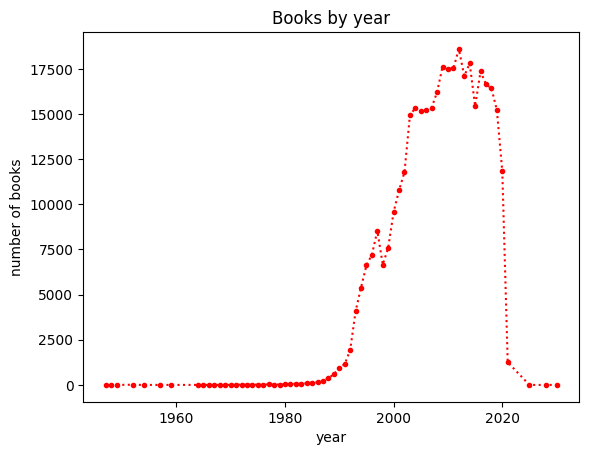

In [30]:
plt.plot(count_by_year, marker='.', linestyle=':', color='red')
plt.title('Books by year')
plt.xlabel('year')
plt.ylabel('number of books')
plt.show()

마커, 선 모양, 색깔을 하나의 문자열로 합쳐서 선 그래프의 포맷으로 나타낼 수도 있음

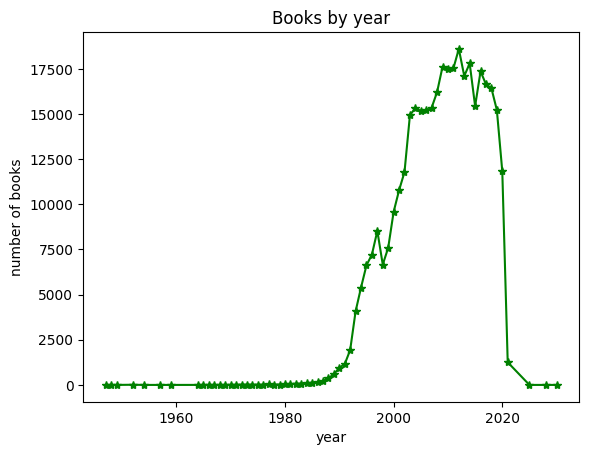

In [35]:
plt.plot(count_by_year, '*-g')
plt.title('Books by year')
plt.xlabel('year')
plt.ylabel('number of books')
plt.show()

선 그래프 눈금 개수 조절 및 마커에 텍스트 표시하기</br>

xticks()함수를 사용하여 x축 눈금을 지정</br>
items()메서드를 사용하며 인덱스와 값을 감싼 튜플을 얻을 수 있음</br>
annotate()함수를 사용하여 그래프에 값을 표시(그래프에 나타낼 문자열 지정, 무자열이 나타날 x, y 좌표를 튜플로 지정)

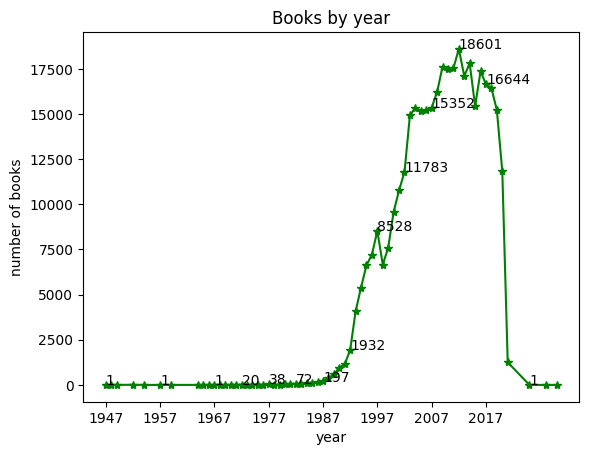

In [38]:
plt.plot(count_by_year, '*-g')
plt.title('Books by year')
plt.xlabel('year')
plt.ylabel('number of books')
plt.xticks(range(1947, 2027, 10)) # 1947년부터 2027년까지 10년씩 건너뛰면서 눈금 표시
for idx, val in count_by_year[::5].items(): #슬라이스 연잔사의 스텝 옵션 사용, items()를 사용해 튜플 얻음
  plt.annotate(val, (idx, val)) # 그래프테 나타낼 문자열 , 텍스트가 나타날 x,y 좌표

plt.show()

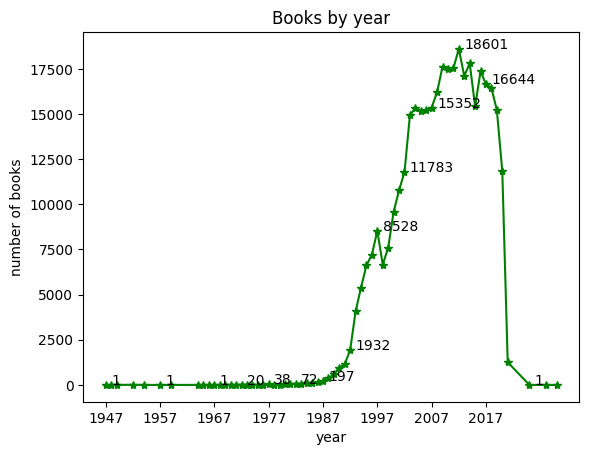

In [39]:
plt.plot(count_by_year, '*-g')
plt.title('Books by year')
plt.xlabel('year')
plt.ylabel('number of books')
plt.xticks(range(1947, 2027, 10))
for idx, val in count_by_year[::5].items():
  plt.annotate(val, (idx, val), xytext=(idx+1, val+10)) # xytext를 사용하여 x축만큼 1 y축만큼 10 떨어진곳에 출력

plt.show()

y축으로 10 떨어진건 티가 많이 안남 y축의 스케일이 크기 떄문</br>

상대적인 위치를 포인트나 픽셀 단위로 지정해야함 xytext 매개변수와 함께 textcoords 매개변수 사용 포인트 단위의 상대 위치를 타나내는 offset points를 지정 해야함

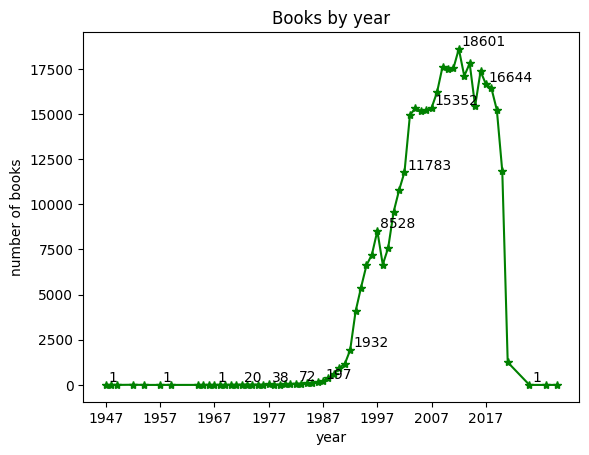

In [40]:
plt.plot(count_by_year, '*-g')
plt.title('Books by year')
plt.xlabel('year')
plt.ylabel('number of books')
plt.xticks(range(1947, 2027, 10))
for idx, val in count_by_year[::5].items():
  plt.annotate(val, (idx, val), xytext=(2,2), textcoords='offset points') # 2/dpi 인치를 의미함

plt.show()

**막대 그래프 그리기**

bar() 함수 : 막대 그래프

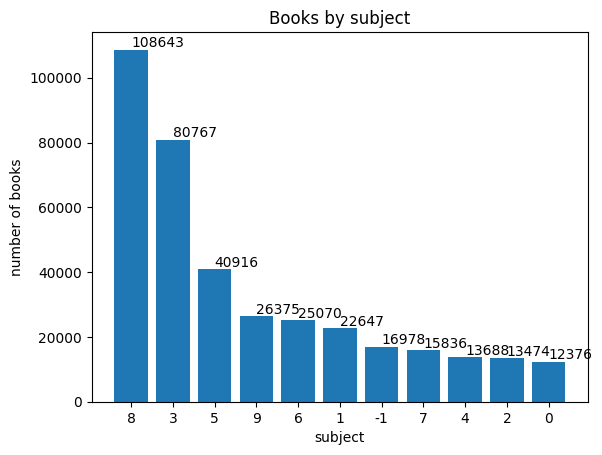

In [41]:
plt.bar(count_by_subject.index, count_by_subject.values) # 주제준류번호인덱스, 도서 개수
plt.title('Books by subject')
plt.xlabel('subject')
plt.ylabel('number of books')
for idx, val in count_by_subject.items():
  plt.annotate(val, (idx, val), xytext=(0,2), textcoords='offset points')
plt.show()

텍스트 정렬, 막대 조절 및 색상 바꾸기</br>
annotate() 함수에 ha 매개변수 : 텍스트 위치 조절 (ha='center) # 텍스트 위치 중앙으로 조절</br>
fontsize 매개변수 : 폰트 크기조절</Br>
color 매개변수 : 텍스트 색깔 조정</br>
bar()함수에 width 매개변수 : 두께조절
color 매개변수 : 바 색깔 조정

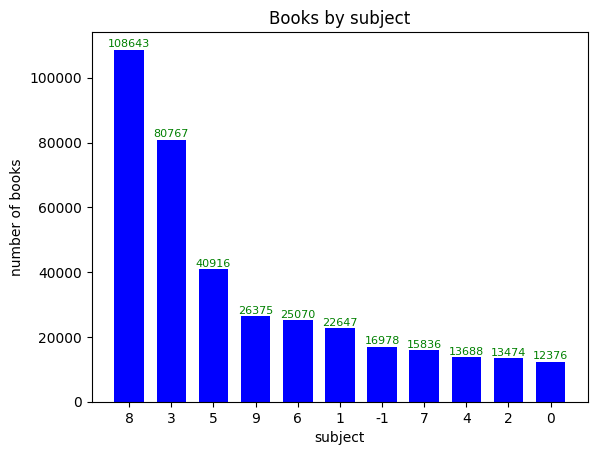

In [43]:
plt.bar(count_by_subject.index, count_by_subject.values, width=0.7, color='blue')
plt.title('Books by subject')
plt.xlabel('subject')
plt.ylabel('number of books')
for idx, val in count_by_subject.items():
  plt.annotate(val, (idx, val), xytext=(0,2), textcoords='offset points', fontsize=8, ha='center', color='green')
plt.show()

가로 막대 그래프 그리기</br>

barh() 함수 : 가로막대 그래프</br>
height 매개변수 : 두께를 조정(세로는 width)</br>
annotate() 함수에 x,y축의 값이 바뀜</br>

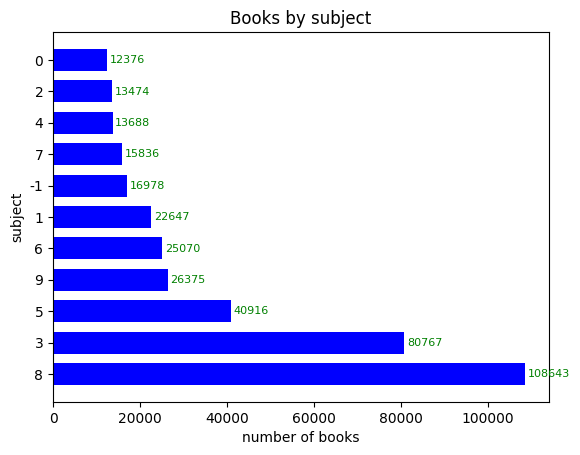

In [45]:
plt.barh(count_by_subject.index, count_by_subject.values, height=0.7, color='blue')
plt.title('Books by subject')
plt.xlabel('number of books')
plt.ylabel('subject')
for idx, val in count_by_subject.items():
  plt.annotate(val, (val,idx), xytext=(2,0), textcoords='offset points', fontsize=8, va='center', color='green')
plt.show()

**이미지 출력하고 저장하기**

In [52]:
import sys
if 'google.colab' in sys.modules: # 구글코랩이 실행중이면
  !wget https://bit.ly/3wrj4xf -O jupiter.png # 이미지 파일 저장

--2023-07-03 08:27:11--  https://bit.ly/3wrj4xf
Resolving bit.ly (bit.ly)... 67.199.248.11, 67.199.248.10
Connecting to bit.ly (bit.ly)|67.199.248.11|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://raw.githubusercontent.com/rickiepark/hg-da/main/jupiter.png [following]
--2023-07-03 08:27:11--  https://raw.githubusercontent.com/rickiepark/hg-da/main/jupiter.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3287363 (3.1M) [image/png]
Saving to: ‘jupiter.png’

jupiter.png         100%[===================>]   3.13M  --.-KB/s    in 0.02s   

2023-07-03 08:27:11 (179 MB/s) - ‘jupiter.png’ saved [3287363/3287363]



이미지 읽기</br>
matplotlib에서 이미지 읽을때 imread() 함수 사용

In [53]:
img=plt.imread('jupiter.png')
img.shape #이미지의 높이, 너비 , 채널

(1561, 1646, 3)

이미지 화면에 출력하기</br>
imshow() 함수 사용

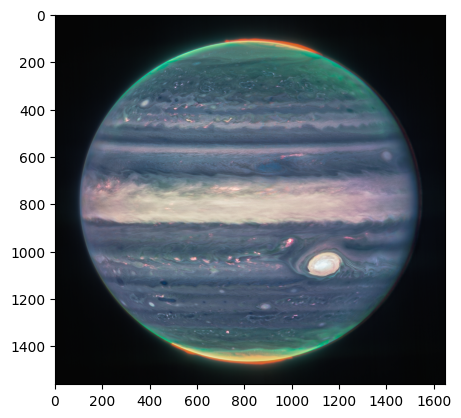

In [54]:
plt.imshow(img) # 크기에 상관없이 기본적으로 원본의 이미지의 가로세로 비율 유지
plt.show()

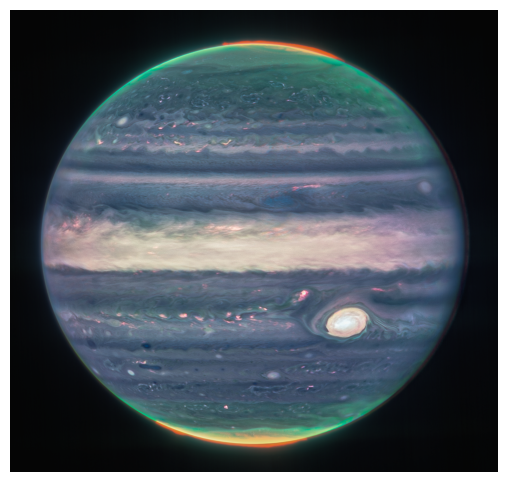

In [56]:
plt.figure(figsize=(8,6)) # 크기를 설정해도 같은 비율의 크기로 출력
plt.imshow(img)
plt.axis('off') # 축과 눈금 출력하지 않음
plt.show()

Pillow 패키지</br>
이미지를 분석하거나 처리할 수 있는 유용한 기능 제공

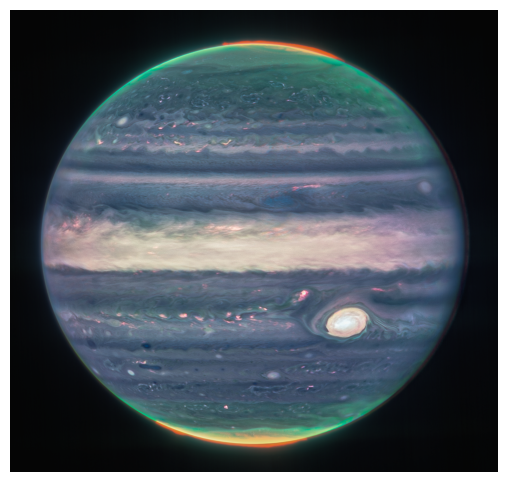

In [60]:
from PIL import Image

pil_img = Image.open('jupiter.png')
plt.figure(figsize=(8,6))
plt.imshow(pil_img)
plt.axis('off')
plt.show()

In [61]:
arr_img = np.array(pil_img)
arr_img.shape

(1561, 1646, 3)

이미지 저장하기</br>

imsave()함수 : 첫 번째 매개변수=저장한 파일 이름, 두 번째 매개변수=이미지가 저장된 넘파이 배열

In [62]:
plt.imsave('jupiter.jpg', arr_img)

그래프를 이미지로 저장하기</br>

savefig() 함수</br>
첫 번째 매개변수는 저장할 이미지의 파일이름</br>
dpi 매개변수에는 그래프를 저장할 때 사용할 DPI를 따로 지정가능 or rcParams['savefig.dpi']로 DPI 지정 가능

In [64]:
plt.rcParams['savefig.dpi']

'figure'

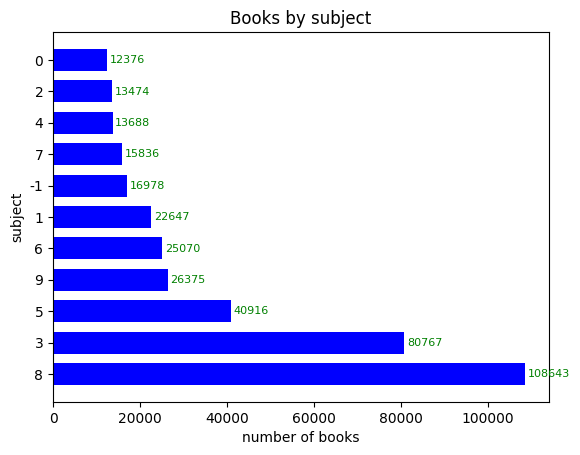

In [65]:
plt.barh(count_by_subject.index, count_by_subject.values, height=0.7, color='blue')
plt.title('Books by subject')
plt.xlabel('number of books')
plt.ylabel('subject')
for idx, val in count_by_subject.items():
  plt.annotate(val, (val,idx), xytext=(2,0), textcoords='offset points', fontsize=8, va='center', color='green')
plt.savefig('books_by_subject.png')
plt.show()

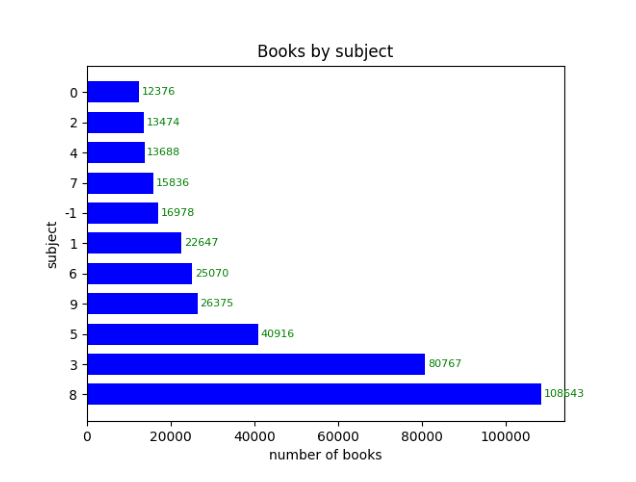

In [66]:
pil_img = Image.open('books_by_subject.png')

plt.figure(figsize=(8,6))
plt.imshow(pil_img)
plt.axis('off')
plt.show()

# 마무리

figure : matplotlib의 그래프 요소를 모두 담고 있는 최상위 객체</Br>
rcParams : matplotlib 그래읲 기본값을 관리하는 객체</br>
축 : 그래프에서 데이터 좌표를 표현</br>
marker : 그래프에 데이터 포인트를 표시하는 방법</br>
subplot : figure안에 포함된 그래프 영역, 보통 Axes 객체를 일컫음</br>

matplotlib.pyplot.figure() : 피겨 객체를 만들어 반환</br>
matplotlib.pyplot.subplot() : 피겨와 서브플롯을 생성하여 반환</br>
Axes.set_xscale() : 서브플롯의 x축 스케일 지정</br>
Axes.set_yscale() : 서브플롯의 y축 스케일 지정</br>
Axes.set_title() : 서브플롯의 제목 설정</br>
Axes.set_xlabel() : 서브플롯의 x축 이름 지정</br>
Axes.set_ylabel() : 서브플롯의 y축 이름 지정</br>

선 그래프 : 각 데이터 포인트를 직선으로 연결한 그래프</br>
막대 그래프 : 데이터 포인트의 크기를 막대 높이로 나타낸 그래프</br>

matplotlib.pyplot.plot() : 선 그래프를 그림</br>
matplotlib.pyplot.title() :그래프 제목 설정</br>
matplotlib.pyplot.xlabel() : x축 이름 지정</br>
matplotlib.pyplot.ylabel() : y축 이름 지정</br>
matplotlib.pyplot.xticks() : x축의 눈금 위치와 레이블 지정</br>
matplotlib.pyplot.annotate() : 지정한 좌표에 텍스트 출력</br>
matplotlib.pyplot.bar() : 세로 막대 그래프를 그림</br>
matplotlib.pyplot.barh() : 가로 막대 그래프를 그림</br>
matplotlib.pyplot.imread() : 이미지 파일을 넘파이 배열로 읽어들임</br>
matplotlib.pyplot.imshow() : 이미지를 출력</br>
matplotlib.pyplot.imsvae() : 넘파이 배열을 이미지 파일로 저장</br>
matplotlib.pyplot.savefig() : 그래프를 이미지로 저장</br>